<a href="https://colab.research.google.com/github/zhuhel/NER_Covid19/blob/master/NER_with_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read datasets and tags

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import nltk
nltk.download('punkt')
import json
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
input_dir = "/content/gdrive/My Drive/Covid19_data/"

f = open(input_dir+'new_train.json','r')
data = []
for line in f:
  data.append(json.loads(line))
data0=data[10]

In [ ]:
data0

{'entities': [{'end': 35,
   'entity': 'Anal human papillomavirus infection',
   'start': 0,
   'type': 'Disease'},
  {'end': 146, 'entity': 'Anal HPV', 'start': 138, 'type': 'Disease'},
  {'end': 162, 'entity': 'anal cancer', 'start': 151, 'type': 'Disease'},
  {'end': 444, 'entity': 'anal cancer', 'start': 433, 'type': 'Disease'},
  {'end': 271, 'entity': 'cancer', 'start': 265, 'type': 'Disease'},
  {'end': 340, 'entity': 'cancer', 'start': 334, 'type': 'Disease'}],
 'text': 'Anal human papillomavirus infection and associated neoplastic lesions in men who have sex with men: a systematic review and meta-analysis\tAnal HPV and anal cancer precursors were very common in MSM. However, on the basis of restricted data, rates of progression to cancer seem to be substantially lower than they are for cervical pre-cancerous lesions. Large, good-quality prospective studies are needed to inform the development of anal cancer screening guidelines for MSM.'}

In [ ]:
def get_text_tags(data0):
  text0 = data0['text']
  len0 = len(text0)
  start = [entity['start'] for entity in data0['entities']]
  end = [entity['end'] for entity in data0['entities']]
  entity = [entity['entity'] for entity in data0['entities']]
  type = [entity['type'] for entity in data0['entities']]
  start_end = []
  for i in range(len(entity)):
    # 测试给的 entity 是不是都在文本中出现了
    if (not entity[i] in text0) or start[i] >= end[i]:
      pass
    else:
      start_end.append((start[i],end[i],entity[i],type[i]))
  # start_end = list(zip(start,end,entity,type))
  start_end.sort()
  num_list = [0]
  for item in start_end:
    num_list.append(item[0])
    num_list.append(item[1])
  # num_list 包含所有的 entity 起止位置信息，用来分割整个文本，之后，在 entity 起止位置之内的单词会被相应标记，而在之外的会被标记为 O
  num_list.append(len0)
  texts = []
  final_tags = []

  for i in range(len(num_list)-1):
    if i%2 == 0:
      # word_tokenize 是 nltk 的一个函数，用来将文本分割成 token 的列表
      tokens = word_tokenize(text0[num_list[i]:num_list[i+1]])
      tags = ['O']*len(tokens)
    else:
      tokens = word_tokenize(text0[num_list[i]:num_list[i+1]])
      # start_end 每一行的第三列即为 entity 信息
      tags = ['I-'+start_end[i//2][3]]*len(tokens)
      if len(tags):
        tags[0] = tags[0].replace('I-','B-')
      else:
        print(start_end[i//2])
    texts += tokens
    final_tags += tags

  return texts, final_tags

In [ ]:
get_text_tags(data0)

(['Anal',
  'human',
  'papillomavirus',
  'infection',
  'and',
  'associated',
  'neoplastic',
  'lesions',
  'in',
  'men',
  'who',
  'have',
  'sex',
  'with',
  'men',
  ':',
  'a',
  'systematic',
  'review',
  'and',
  'meta-analysis',
  'Anal',
  'HPV',
  'and',
  'anal',
  'cancer',
  'precursors',
  'were',
  'very',
  'common',
  'in',
  'MSM',
  '.',
  'However',
  ',',
  'on',
  'the',
  'basis',
  'of',
  'restricted',
  'data',
  ',',
  'rates',
  'of',
  'progression',
  'to',
  'cancer',
  'seem',
  'to',
  'be',
  'substantially',
  'lower',
  'than',
  'they',
  'are',
  'for',
  'cervical',
  'pre-',
  'cancer',
  'ous',
  'lesions',
  '.',
  'Large',
  ',',
  'good-quality',
  'prospective',
  'studies',
  'are',
  'needed',
  'to',
  'inform',
  'the',
  'development',
  'of',
  'anal',
  'cancer',
  'screening',
  'guidelines',
  'for',
  'MSM',
  '.'],
 ['B-Disease',
  'I-Disease',
  'I-Disease',
  'I-Disease',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
 

In [ ]:
combined_text, combined_tags, list_tags = [], [], []
for data0 in data:
  return_texts, return_tags = get_text_tags(data0)
  ## separate sentences
  ind_end = -1
  for it, txt in enumerate(return_texts):
    if txt == '.':
      combined_text += [return_texts[ind_end+1:it]]
      combined_tags += [return_tags[ind_end+1:it]]
      ind_end = it
  #combined_text.append(return_texts)
  #combined_tags.append(return_tags)
  list_tags += return_tags

In [ ]:
combined_tags[:5]

[['O',
  'O',
  'O',
  'O',
  'O',
  'B-Drug',
  'O',
  'B-Disease',
  'I-Disease',
  'I-Disease',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-Drug',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-Disease',
  'I-Disease',
  'I-Disease',
  'O',
  'O',
  'O',
  'O',
  'B-Gene'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-Disease',
  'I-Disease',
  'I-Disease',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-Virus',
  'I-Virus',
  'B-Disease',
  'O',
  'B-Virus',
  'I-Virus',
  '

# Encode (digitize) text and tags

In [ ]:
#install the amazing transformers package by huggingface
!pip install transformers

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 778kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 13.3MB/s 
     |████████████████████████████████| 890kB 16.6MB/s 
     |████████████████████████████████| 3.0MB 4.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=0017aea1b331ab0358b3a68c1476a8feebb297a29e2569e6cfcd3869341c02f0
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


Using TensorFlow backend.


In [ ]:
## setup GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
## extract subset(s) of token, improve f1 from 0.55 to 0.7 (amazing?)
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

In [ ]:
## compare the difference
tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(combined_text, combined_tags)
]
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

print(combined_text[0])
print(tokenized_texts[0])

['Safety', 'and', 'efficacy', 'of', 'intravenous', 'bimagrumab', 'in', 'inclusion', 'body', 'myositis', '(', 'RESILIENT', ')', ':', 'a', 'randomised', ',', 'double-blind', ',', 'placebo-controlled', 'phase', '2b', 'trial', 'Bimagrumab', 'showed', 'a', 'good', 'safety', 'profile', ',', 'relative', 'to', 'placebo', ',', 'in', 'individuals', 'with', 'inclusion', 'body', 'myositis', 'but', 'did', 'not', 'improve', '6MWD']
['safety', 'and', 'efficacy', 'of', 'intra', '##ven', '##ous', 'bi', '##ma', '##gr', '##uma', '##b', 'in', 'inclusion', 'body', 'my', '##osi', '##tis', '(', 'res', '##ili', '##ent', ')', ':', 'a', 'random', '##ised', ',', 'double', '-', 'blind', ',', 'place', '##bo', '-', 'controlled', 'phase', '2', '##b', 'trial', 'bi', '##ma', '##gr', '##uma', '##b', 'showed', 'a', 'good', 'safety', 'profile', ',', 'relative', 'to', 'place', '##bo', ',', 'in', 'individuals', 'with', 'inclusion', 'body', 'my', '##osi', '##tis', 'but', 'did', 'not', 'improve', '6', '##m', '##wd']


In [ ]:
combined_text = tokenized_texts
combined_tags = labels

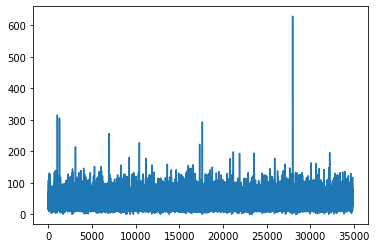

In [ ]:
text_len = []
for txt in combined_text:
  text_len.append(len(txt))

plt.plot(text_len)
plt.show()

In [ ]:
MAX_LEN = 150
bs = 32
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in combined_text],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")


In [ ]:
tag_values = list(set(list_tags))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}

print(tag_values)

['B-Virus', 'B-Organization', 'I-Drug', 'B-Drug', 'O', 'I-Virus', 'B-Chemical', 'B-Disease', 'I-Disease', 'B-Gene', 'I-Organization', 'I-Chemical', 'I-ChemicalCompound', 'I-Gene', 'B-Phenotype', 'I-Phenotype', 'B-ChemicalCompound', 'PAD']


In [ ]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in combined_tags],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

tags[0]

array([ 4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  4,  7,  8,  8,  8,
        8,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  7,  8,  8,  8,  8,  4,  4,  4,  4,
        9,  9,  9, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17])

In [ ]:
print(combined_text[0])
print(input_ids[0])

['Safety', 'and', 'efficacy', 'of', 'in', '##tra', '##ven', '##ous', 'bi', '##ma', '##g', '##rum', '##ab', 'in', 'inclusion', 'body', 'my', '##os', '##itis', '(', 'R', '##ES', '##IL', '##IE', '##NT', ')', ':', 'a', 'random', '##ised', ',', 'double', '-', 'blind', ',', 'place', '##bo', '-', 'controlled', 'phase', '2', '##b', 'trial', 'B', '##ima', '##g', '##rum', '##ab', 'showed', 'a', 'good', 'safety', 'profile', ',', 'relative', 'to', 'place', '##bo', ',', 'in', 'individuals', 'with', 'inclusion', 'body', 'my', '##os', '##itis', 'but', 'did', 'not', 'improve', '6', '##M', '##WD']
[ 9218  1105 23891  1104  1107  4487  7912  2285 16516  1918  1403  5697
  6639  1107 10838  1404  1139  2155 10721   113   155  9919 17656 17444
 15681   114   131   170  7091  3673   117  2702   118  7198   117  1282
  4043   118  4013  4065   123  1830  3443   139  8628  1403  5697  6639
  2799   170  1363  3429  6168   117  5236  1106  1282  4043   117  1107
  2833  1114 10838  1404  1139  2155 10721  113

In [ ]:
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]
#attention_masks[0]

In [ ]:
# split data for trainning (tr_) and validation (val_), here use keras (tensorflow backend)
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.2)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.2)

In [ ]:
# convert data to torch tensors
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

In [ ]:
# The last step is to define the dataloaders. We shuffle the data at training time with the RandomSampler and at test time we just pass them sequentially with the SequentialSampler.
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)

# Setup the Bert model for finetuning

In [ ]:
import transformers
from transformers import BertForTokenClassification, AdamW

transformers.__version__

'3.0.2'

In [ ]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [ ]:
model.cuda();

In [ ]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 4
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Training: fit BERT for named entity recognition

In [ ]:
!pip install seqeval
from seqeval.metrics import f1_score, accuracy_score

  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=e09f0f72dd2450f97a11c1d94eca16c9979809ca726aa338681bc53ef43cb701
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
from tqdm import tqdm, trange
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []
f1_values, validation_f1_values = [], []
acc_values, validation_acc_values = [], []

total_t0 = time.time()
for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Measure how long the training epoch takes.
    t0 = time.time()
    # Put the model into training mode.
    model.train()
    # Reset the total loss for this epoch.
    total_loss = 0
    tr_pred , tr_true_labels = [], []


    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()

        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

        # Move logits and labels to CPU
        tr_logits = outputs[1].detach().cpu().numpy()
        tr_label = b_labels.to('cpu').numpy()
        tr_pred.extend([list(p) for p in np.argmax(tr_logits, axis=2)])
        tr_true_labels.extend(tr_label)
        

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Train loss: {}".format(avg_train_loss))
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    tr_pred_tags = [tag_values[p_i] for p, l in zip(tr_pred, tr_true_labels)
                                 for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
    train_tags = [tag_values[l_i] for l in tr_true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]
    train_acc = accuracy_score(tr_pred_tags, train_tags)
    train_f1 = f1_score(tr_pred_tags, train_tags)
    print("Train Accuracy: {}".format(train_acc))
    print("Train F1-Score: {}".format(train_f1))
    acc_values.append(train_acc)
    f1_values.append(train_f1)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")
    t0 = time.time()

    # Put the model into evaluation mode
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

    eval_loss = eval_loss / len(valid_dataloader)
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
    valid_tags = [tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]
    valid_acc = accuracy_score(pred_tags, valid_tags)
    valid_f1 = f1_score(pred_tags, valid_tags)
    print("Validation Accuracy: {}".format(valid_acc))
    print("Validation F1-Score: {}".format(valid_f1))
    validation_acc_values.append(valid_acc)
    validation_f1_values.append(valid_f1)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    print("  Validation took: {:}".format(validation_time))
    print()

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 0.30290947467464646
Train Accuracy: 0.9137176470368437
Train F1-Score: 0.6260103977849929
  Training epcoh took: 0:21:57

Running Validation...
Validation loss: 0.20999044928392138


Epoch:  25%|██▌       | 1/4 [23:58<1:11:56, 1438.70s/it]

Validation Accuracy: 0.9376122809462294
Validation F1-Score: 0.7489434942295575
  Validation took: 0:02:02

Train loss: 0.17521548442064075
Train Accuracy: 0.9467966748155296
Train F1-Score: 0.7785494837184591
  Training epcoh took: 0:21:56

Running Validation...
Validation loss: 0.17996937125374418


Epoch:  50%|█████     | 2/4 [47:55<47:56, 1438.24s/it]  

Validation Accuracy: 0.9461842367908646
Validation F1-Score: 0.7927416813003738
  Validation took: 0:02:02

Train loss: 0.12879494074390296
Train Accuracy: 0.9606836824390914
Train F1-Score: 0.8375247675659199
  Training epcoh took: 0:21:55

Running Validation...
Validation loss: 0.17017323356292663


Epoch:  75%|███████▌  | 3/4 [1:11:52<23:57, 1437.87s/it]

Validation Accuracy: 0.9511970984908688
Validation F1-Score: 0.8101097747379147
  Validation took: 0:02:02

Train loss: 0.09972908490747555
Train Accuracy: 0.9693768408505582
Train F1-Score: 0.8717588550168938
  Training epcoh took: 0:21:53

Running Validation...
Validation loss: 0.17695203987420152


Epoch: 100%|██████████| 4/4 [1:35:47<00:00, 1436.97s/it]

Validation Accuracy: 0.9513213843181416
Validation F1-Score: 0.8133238709287752
  Validation took: 0:02:02


Training complete!
Total training took 1:35:48 (h:mm:ss)


In [ ]:
import os
# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = '/content/gdrive/My Drive/Covid19_data/model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to /content/gdrive/My Drive/Covid19_data/model_save/


('/content/gdrive/My Drive/Covid19_data/model_save/vocab.txt',
 '/content/gdrive/My Drive/Covid19_data/model_save/special_tokens_map.json',
 '/content/gdrive/My Drive/Covid19_data/model_save/added_tokens.json')

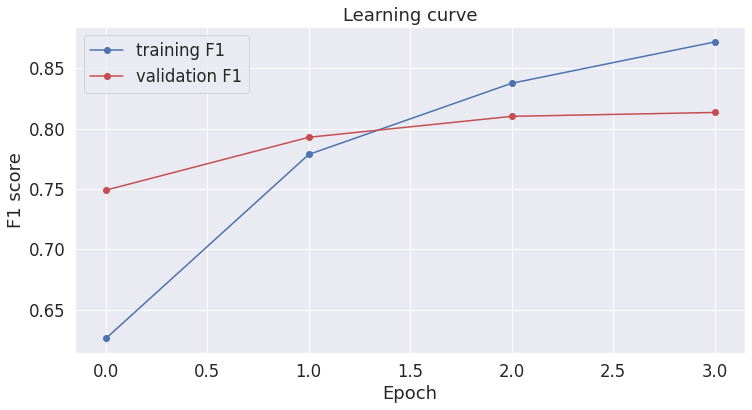

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(f1_values, 'b-o', label="training F1")
plt.plot(validation_f1_values, 'r-o', label="validation F1")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("F1 score")
plt.legend()

plt.show()

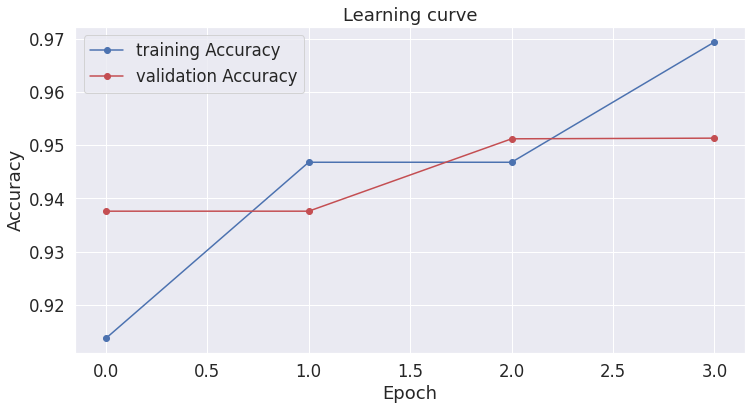

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

acc_values = [0.9137176470368437, 0.9467966748155296, 0.9467966748155296, 0.9693768408505582]
validation_acc_values = [0.9376122809462294, 0.9376122809462294, 0.9511970984908688, 0.9513213843181416]

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(acc_values, 'b-o', label="training Accuracy")
plt.plot(validation_acc_values, 'r-o', label="validation Accuracy")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# Apply the model to a new sentence

In [ ]:
test_sentence="""
Shared and distinct genetic risk factors for childhood-onset and adult-onset asthma: genome-wide and transcriptome-wide studies\tGenetic risk factors for adult-onset asthma are largely a subset of the genetic risk for childhood-onset asthma but with overall smaller effects, suggesting a greater role for non-genetic risk factors in adult-onset asthma. Combined with gene expression and tissue enrichment patterns, we suggest that the establishment of disease in children is driven more by dysregulated allergy and epithelial barrier function genes, whereas the cause of adult-onset asthma is more lung-centred and environmentally determined, but with immune-mediated mechanisms driving disease progression in both children and adults.
"""

In [ ]:
# first tokenize the text
tokenized_sentence = tokenizer.encode(test_sentence)
test_input_ids = torch.tensor([tokenized_sentence]).cuda()

test_input_ids

tensor([[  101,  4207,  1998,  5664,  7403,  3891,  5876,  2005,  5593,  1011,
         14447,  1998,  4639,  1011, 14447, 26180,  1024, 13458,  1011,  2898,
          1998, 24051,  8462,  1011,  2898,  2913,  7403,  3891,  5876,  2005,
          4639,  1011, 14447, 26180,  2024,  4321,  1037, 16745,  1997,  1996,
          7403,  3891,  2005,  5593,  1011, 14447, 26180,  2021,  2007,  3452,
          3760,  3896,  1010,  9104,  1037,  3618,  2535,  2005,  2512,  1011,
          7403,  3891,  5876,  1999,  4639,  1011, 14447, 26180,  1012,  4117,
          2007,  4962,  3670,  1998,  8153, 27226,  7060,  1010,  2057,  6592,
          2008,  1996,  5069,  1997,  4295,  1999,  2336,  2003,  5533,  2062,
          2011,  1040,  7274,  2890, 24848,  4383,  2035, 24395,  1998,  4958,
          8939, 24587,  8803,  3853,  9165,  1010,  6168,  1996,  3426,  1997,
          4639,  1011, 14447, 26180,  2003,  2062, 11192,  1011, 16441,  1998,
         25262,  4340,  1010,  2021,  2007, 11311,  

In [ ]:
model.eval()
# run the sentence through the model
with torch.no_grad():
    output = model(test_input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

In [ ]:
# join bpe split tokens
tokens = tokenizer.convert_ids_to_tokens(test_input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []
for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(tag_values[label_idx])
        new_tokens.append(token)

In [ ]:
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(label, token))

O	[CLS]
O	shared
O	and
O	distinct
O	genetic
O	risk
O	factors
O	for
O	childhood
O	-
O	onset
O	and
O	adult
O	-
O	onset
B-Phenotype	asthma
O	:
O	genome
O	-
O	wide
O	and
O	transcriptome
O	-
O	wide
O	studies
O	genetic
O	risk
O	factors
O	for
O	adult
O	-
O	onset
B-Phenotype	asthma
O	are
O	largely
O	a
O	subset
O	of
O	the
O	genetic
O	risk
O	for
O	childhood
O	-
O	onset
B-Phenotype	asthma
O	but
O	with
O	overall
O	smaller
O	effects
O	,
O	suggesting
O	a
O	greater
O	role
O	for
O	non
O	-
O	genetic
O	risk
O	factors
O	in
O	adult
O	-
O	onset
B-Phenotype	asthma
O	.
O	combined
O	with
O	gene
O	expression
O	and
O	tissue
O	enrichment
O	patterns
O	,
O	we
O	suggest
O	that
O	the
O	establishment
O	of
O	disease
O	in
O	children
O	is
O	driven
O	more
O	by
O	dysregulated
O	allergy
O	and
O	epithelial
O	barrier
O	function
O	genes
O	,
O	whereas
O	the
O	cause
O	of
O	adult
O	-
O	onset
B-Phenotype	asthma
O	is
O	more
O	lung
O	-
O	centred
O	and
O	environmentally
O	determined
O	,
O	but
O	with
O	immune
O	-
O	mediated
O	mechani

# Evaluate datasets from biendata

In [ ]:
f_val = open(input_dir+'new_val.json','r')
data = []
for line in f_val:
  oneline = json.loads(line)['text'].split('.')
  for sent in oneline:
    if len(sent) == 0: continue
    if sent[0]==' ': sent = sent[1:]
    data.append(sent)

data[:5]

['Shared and distinct genetic risk factors for childhood-onset and adult-onset asthma: genome-wide and transcriptome-wide studies\tGenetic risk factors for adult-onset asthma are largely a subset of the genetic risk for childhood-onset asthma but with overall smaller effects, suggesting a greater role for non-genetic risk factors in adult-onset asthma',
 'Combined with gene expression and tissue enrichment patterns, we suggest that the establishment of disease in children is driven more by dysregulated allergy and epithelial barrier function genes, whereas the cause of adult-onset asthma is more lung-centred and environmentally determined, but with immune-mediated mechanisms driving disease progression in both children and adults',
 'Spousal violence and potentially preventable single and recurrent spontaneous fetal loss in an African setting: cross-sectional study\tSpousal violence increases the likelihood of single and repeated fetal loss',
 'A large proportion of risk for recurrent 

In [ ]:
eval_text = []
for data0 in data:
  return_texts = tokenizer.encode(data0)
  return_tags = ['O']*len(return_texts)
  eval_text.append(return_texts)
  eval_tags.append(return_tags)

In [ ]:
eval_tags[1][:128]

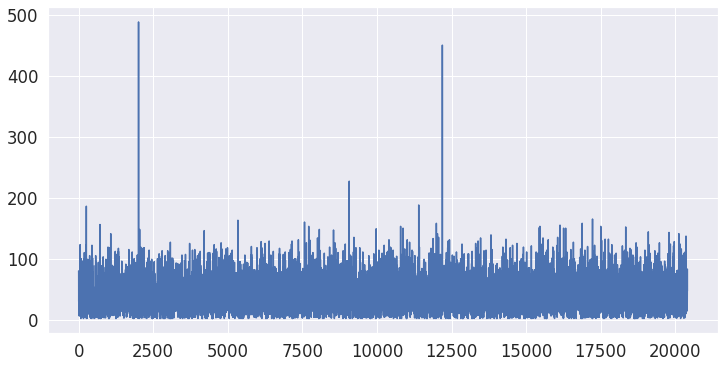

In [ ]:
text_len = []
for txt in eval_text:
  text_len.append(len(txt))

plt.plot(text_len)
plt.show()

In [ ]:
#tokenized_texts_and_labels = [
#    tokenize_and_preserve_labels(sent, labs)
#    for sent, labs in zip(eval_text, eval_tags)
#]
#tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]

#print(eval_text[0])
#print(tokenized_texts[0])

AttributeError: ignored

In [ ]:
#eval_text = tokenized_texts

In [ ]:
MAX_LEN = 150
eval_input_ids = pad_sequences(eval_text,
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")
eval_input_ids[:2]

array([[  101,   156, 22705,  1181,  1105,  4966,  7434,  3187,  5320,
         1111,  5153,   118, 15415,  1105,  4457,   118, 15415,  1112,
         1582,  1918,   131, 15519,   118,  2043,  1105, 14715, 13590,
         6758,   118,  2043,  2527,  9066,  2941,  3187,  5320,  1111,
         4457,   118, 15415,  1112,  1582,  1918,  1132,  3494,   170,
        18005,  1104,  1103,  7434,  3187,  1111,  5153,   118, 15415,
         1112,  1582,  1918,  1133,  1114,  2905,  2964,  3154,   117,
         8783,   170,  3407,  1648,  1111,  1664,   118,  7434,  3187,
         5320,  1107,  4457,   118, 15415,  1112,  1582,  1918,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
eval_inputs = torch.tensor(eval_input_ids).cuda()
print(len(eval_inputs), len(eval_inputs[0]))

20404 150


In [ ]:
bs = 32
eval_data = TensorDataset(eval_inputs)
eval_sampler = SequentialSampler(eval_data)
eval_dataloader = DataLoader(eval_data, sampler=eval_sampler, batch_size=bs)

for ib, batch in enumerate(eval_dataloader):
  if ib>3: break
  print(batch[0])

In [ ]:
# Put the model into evaluation mode
model.eval()
total_labels , total_tokens = [], []
for batch in eval_dataloader:
    b_input_ids = batch[0]
    #print(b_input_ids)

    # Telling the model not to compute or store gradients,
    # saving memory and speeding up validation
    with torch.no_grad():
        # Forward pass, calculate logit predictions.
        # This will return the logits rather than the loss because we have not provided labels.
        output = model(b_input_ids)
    # Move logits and labels to CPU
    label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

    # join bpe split tokens
    tokens = tokenizer.convert_ids_to_tokens(b_input_ids.to('cpu').numpy()[0])
    new_tokens, new_labels = [], []
    for token, label_idx in zip(tokens, label_indices[0]):
        if token.startswith("##"):
            new_tokens[-1] = new_tokens[-1] + token[2:]
        else:
            new_labels.append(tag_values[label_idx])
            new_tokens.append(token)
    total_labels += new_labels
    total_tokens += new_tokens

In [ ]:
with open(input_dir+'output_new_val.txt', 'w') as f:
  for token, label in zip(total_tokens, total_labels):
    print(token, label, file=f, sep='\t')

In [ ]:
dic = {}
for token, label in zip(total_tokens, total_labels):
  if label == 'O': continue
  dic[token] = label
f_val = open(input_dir+'new_val.json','r')
data = []
with open(input_dir+'output_new_val.json', 'w') as f:
  for line in f_val:
    oline = line
    texts = json.loads(line)['text'].split(' ')
    for txt in texts:
      